In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


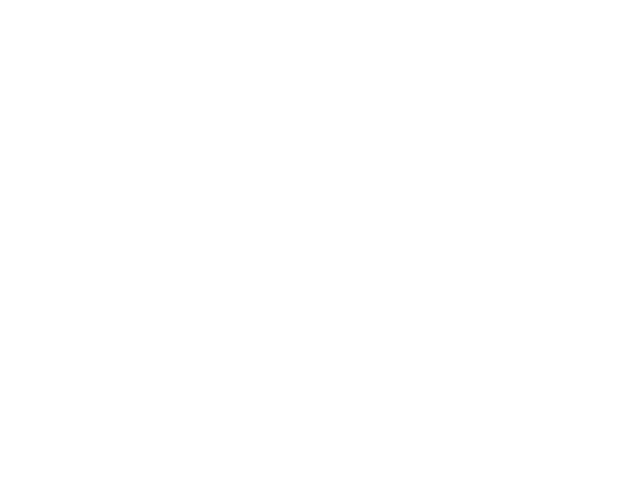

In [2]:
imgCv2 = cv2.imread("goldfish.jpg")
imgMatplot = mpimg.imread("goldfish.jpg")

plt.subplots_adjust(left=0.1,                     
    bottom=0.2,                     
    right=0.9,                     
    top=0.8,                     
    wspace=0.5,                     
    hspace=0.5)

Text(0.5, 1.0, 'B')

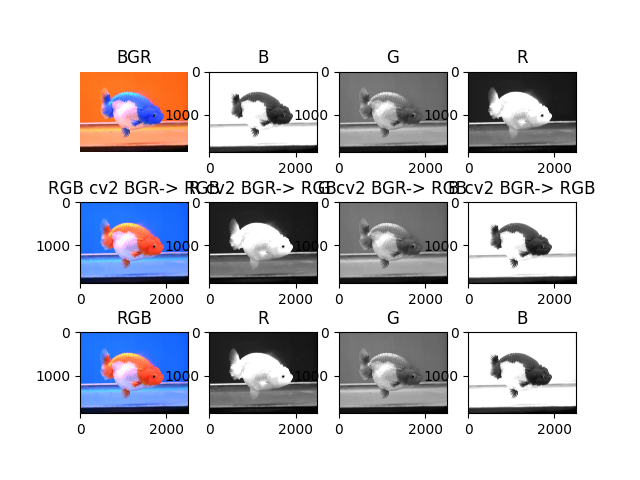

In [3]:
#1.1.1
imgCv2_B = imgCv2[:,:,0]
imgCv2_G = imgCv2[:,:,1]
imgCv2_R = imgCv2[:,:,2]

imgMatplot_R = imgMatplot[:,:,0]
imgMatplot_G = imgMatplot[:,:,1]
imgMatplot_B = imgMatplot[:,:,2]

imgCv2rgb = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2RGB)
imgCv2rgbR = imgCv2rgb[:,:,0]
imgCv2rgbG = imgCv2rgb[:,:,1]
imgCv2rgbB = imgCv2rgb[:,:,2]
#plt.imshow(imgCv2)
#plt.imshow(imgMatplot)
fig, axs = plt.subplots(3, 4) #row colum
axs[0, 0].imshow(imgCv2)
axs[0, 0].set_title("BGR")
axs[0, 0].axis('off')
axs[0, 1].imshow(imgCv2_B, cmap='gray')
axs[0, 1].set_title("B")
axs[0, 2].imshow(imgCv2_G, cmap='gray')
axs[0, 2].set_title("G")
axs[0, 3].imshow(imgCv2_R, cmap='gray')
axs[0, 3].set_title("R")

axs[1, 0].imshow(imgCv2rgb)
axs[1, 0].set_title("RGB cv2 BGR-> RGB")
axs[1, 1].imshow(imgCv2rgbR, cmap='gray')
axs[1, 1].set_title("R cv2 BGR-> RGB")
axs[1, 2].imshow(imgCv2rgbG, cmap='gray')
axs[1, 2].set_title("G cv2 BGR-> RGB")
axs[1, 3].imshow(imgCv2rgbB, cmap='gray')
axs[1, 3].set_title("B cv2 BGR-> RGB")

axs[2, 0].imshow(imgMatplot)
axs[2, 0].set_title("RGB")
axs[2, 1].imshow(imgMatplot_R, cmap='gray')
axs[2, 1].set_title("R")
axs[2, 2].imshow(imgMatplot_G, cmap='gray')
axs[2, 2].set_title("G")
axs[2, 3].imshow(imgMatplot_B, cmap='gray')
axs[2, 3].set_title("B")



R_Origin = (1875, 2501, 3)
R_Transpose = (3, 2501, 1875)
R_moveaxis = (3, 1875, 2501)
R_reshape = (3, 1875, 2501)


Text(0.5, 1.0, 'R_reshape')

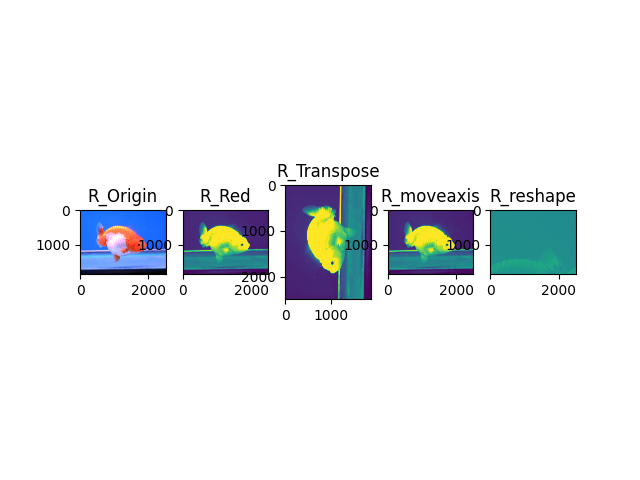

In [4]:
#1.1.2
imgCv2_Origin = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2RGB)
imgR = imgCv2_Origin[:,:,0]
#imgCv2_Transpose = np.transpose(imgCv2_Origin,(2,1,0)) #(0 = H, 1 = W, 2 = C)
imgCv2_Transpose = np.transpose(imgCv2_Origin)
#imgCv2_Transpose = imgCv2_Transpose.T
imgCv2_moveaxis = np.moveaxis(imgCv2_Origin, -1, 0)

imgCv2_reshape = np.reshape(imgCv2_Origin,(3, 1875, 2501))
#imgCv2_reshape = np.moveaxis(imgCv2_Origin, -1, 0)

print("R_Origin = {0}\nR_Transpose = {1}\nR_moveaxis = {2}\nR_reshape = {3}".format(imgCv2_Origin.shape, imgCv2_Transpose.shape, imgCv2_moveaxis.shape, imgCv2_reshape.shape))


fig1, axs1 = plt.subplots(1, 5) #row colum
axs1[0].imshow(imgCv2_Origin)
axs1[0].set_title("R_Origin")

axs1[1].imshow(imgR)
axs1[1].set_title("R_Red")

imgCv2_Transpose_show = imgCv2_Transpose[0,:,:]
axs1[2].imshow(imgCv2_Transpose_show)
axs1[2].set_title("R_Transpose")

imgCv2_moveaxis_show = imgCv2_moveaxis[0,:,:]
axs1[3].imshow(imgCv2_moveaxis_show)
axs1[3].set_title("R_moveaxis")

imgCv2_reshape_show = imgCv2_reshape[0,:,:]
axs1[4].imshow(imgCv2_reshape_show)
axs1[4].set_title("R_reshape")

In [5]:
#1.1.3
def reduce_bitdept_grey(bitdept_level : int , img : list) :
    shape = (img.shape[0], img.shape[1])
    qlevel = math.pow(bitdept_level, 2) - 1
    q = np.zeros(shape)
    for i in range(0,img.shape[0]) :
        for j in range(0,img.shape[1]) :
            q[i][j] = math.floor(((img[i][j] - 0) / (255 - 0))* qlevel)
    return q

Text(0.5, 1.0, '2-Bit')

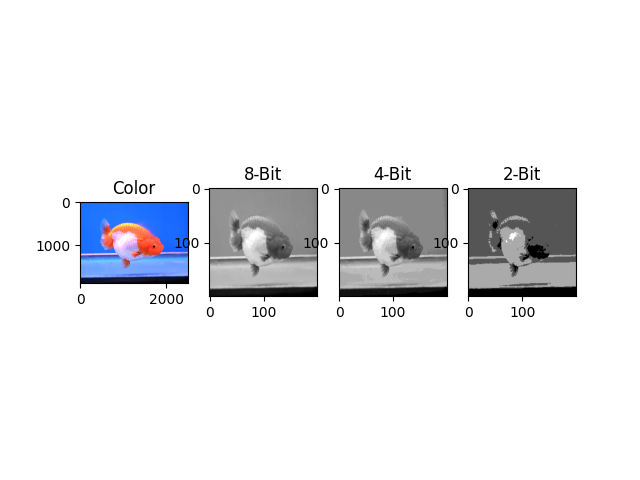

In [6]:
im_gray = cv2.cvtColor(imgCv2_Origin, cv2.COLOR_BGR2GRAY)
im_gray = cv2.resize(im_gray, (200,200))

img_reduced1 = reduce_bitdept_grey(8, im_gray)
img_reduced2 = reduce_bitdept_grey(4, im_gray)
img_reduced3 = reduce_bitdept_grey(2, im_gray)
fig2, axs2 = plt.subplots(1, 4) #row colum
axs2[0].imshow(imgCv2_Origin)
axs2[0].set_title("Color")
axs2[1].imshow(img_reduced1, cmap='gray')
axs2[1].set_title("8-Bit")
axs2[2].imshow(img_reduced2, cmap='gray')
axs2[2].set_title("4-Bit")
axs2[3].imshow(img_reduced3, cmap='gray')
axs2[3].set_title("2-Bit")

In [7]:
#1.1.4
img_gray = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (200,200))

plt.imshow(img_gray, cmap='gray')

(200, 200)


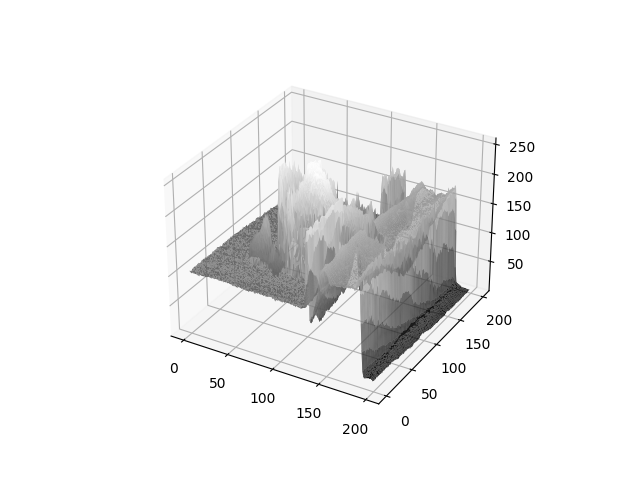

In [8]:
xx, yy = np.mgrid[0:img_gray.shape[0], 0:img_gray.shape[1]]

fig3d = plt.figure()
ax = fig3d.add_subplot(projection='3d')
ax.plot_surface(xx, yy, img_gray, rstride=1, cstride=1, linewidth=0, cmap='gray')
print(img_gray.shape)

Text(0.5, 1.0, 'Cb')

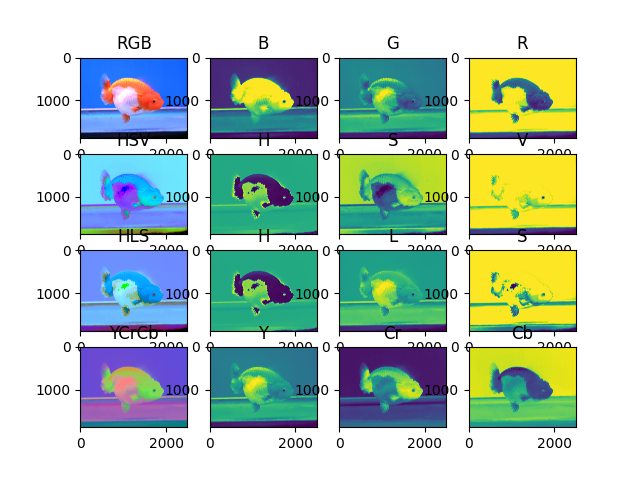

In [9]:
#1.2.1
imgRGB = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2RGB)
imgCv2_B = imgRGB[:,:,0]
imgCv2_G = imgRGB[:,:,1]
imgCv2_R = imgRGB[:,:,2]

imgHSV = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2HSV)
imgHSV_H = imgHSV[:,:,0]
imgHSV_S = imgHSV[:,:,1]
imgHSV_V = imgHSV[:,:,2]

imgHLS = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2HLS)
imgHLS_H = imgHLS[:,:,0]
imgHLS_L = imgHLS[:,:,1]
imgHLS_S = imgHLS[:,:,2]

imgYCrCb = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2YCrCb)
imgYCrCb_Y = imgYCrCb[:,:,0]
imgYCrCb_Cr = imgYCrCb[:,:,1]
imgYCrCb_Cb = imgYCrCb[:,:,2]

#plt.imshow(imgCv2)
#plt.imshow(imgMatplot)
fig2, axs2 = plt.subplots(4, 4) #row colum
axs2[0, 0].imshow(imgRGB)
axs2[0, 0].set_title("RGB")
axs2[0, 1].imshow(imgCv2_B)
axs2[0, 1].set_title("B")
axs2[0, 2].imshow(imgCv2_G)
axs2[0, 2].set_title("G")
axs2[0, 3].imshow(imgCv2_R)
axs2[0, 3].set_title("R")

axs2[1, 0].imshow(imgHSV)
axs2[1, 0].set_title("HSV")
axs2[1, 1].imshow(imgHSV_H)
axs2[1, 1].set_title("H")
axs2[1, 2].imshow(imgHSV_S)
axs2[1, 2].set_title("S")
axs2[1, 3].imshow(imgHSV_V)
axs2[1, 3].set_title("V")

axs2[2, 0].imshow(imgHLS)
axs2[2, 0].set_title("HLS")
axs2[2, 1].imshow(imgHLS_H)
axs2[2, 1].set_title("H")
axs2[2, 2].imshow(imgHLS_L)
axs2[2, 2].set_title("L")
axs2[2, 3].imshow(imgHLS_S)
axs2[2, 3].set_title("S")

axs2[3, 0].imshow(imgYCrCb)
axs2[3, 0].set_title("YCrCb")
axs2[3, 1].imshow(imgYCrCb_Y)
axs2[3, 1].set_title("Y")
axs2[3, 2].imshow(imgYCrCb_Cr)
axs2[3, 2].set_title("Cr")
axs2[3, 3].imshow(imgYCrCb_Cb)
axs2[3, 3].set_title("Cb")

In [10]:
#1.2.2
def create_pairs(n):
    pairs = []
    for i in range(n+1):
        first_value = i / n
        second_value = 1 - first_value
        pair = (round(first_value, 2), round(second_value, 2))
        pairs.append(pair)
    return pairs

w = create_pairs(20)
print(w)

[(0.0, 1.0), (0.05, 0.95), (0.1, 0.9), (0.15, 0.85), (0.2, 0.8), (0.25, 0.75), (0.3, 0.7), (0.35, 0.65), (0.4, 0.6), (0.45, 0.55), (0.5, 0.5), (0.55, 0.45), (0.6, 0.4), (0.65, 0.35), (0.7, 0.3), (0.75, 0.25), (0.8, 0.2), (0.85, 0.15), (0.9, 0.1), (0.95, 0.05), (1.0, 0.0)]


In [11]:
img1 = cv2.imread("goldfish.jpg")
img1 = cv2.resize(img1,(200,200))
im_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("sea.jpg")
img2 = cv2.resize(img2,(200,200))
im_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

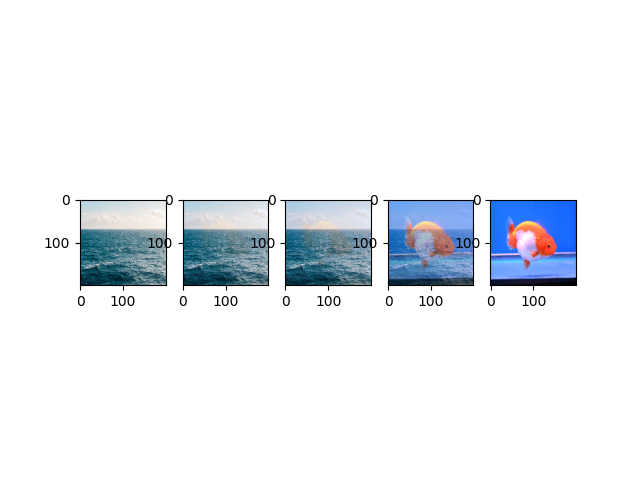

In [12]:
imgs = []
for i in range(len(w)) :
    imgs.append(cv2.addWeighted(im_rgb1,w[i][0],im_rgb2,w[i][1],0))
fig3, axs3 = plt.subplots(1, 5) #row colum
axs3[0].imshow(imgs[0])
axs3[1].imshow(imgs[1])
axs3[2].imshow(imgs[2])
axs3[3].imshow(imgs[10])
axs3[4].imshow(imgs[20])

In [13]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, (200,200))

for i in range(len(imgs)):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2BGR)
    out.write(imgs[i])
out.release()

Text(0.5, 1.0, 'masked')

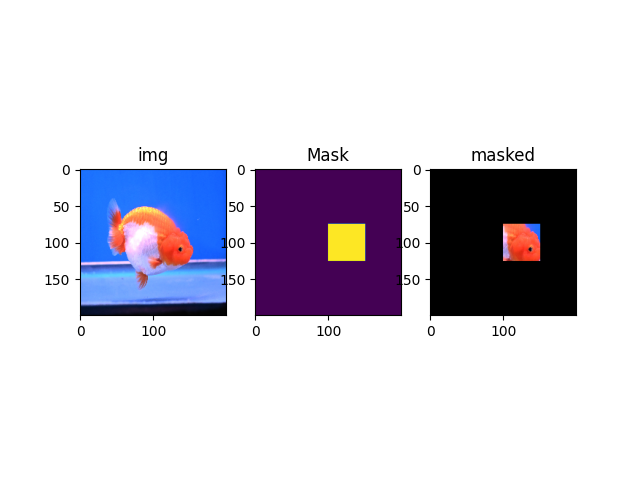

In [14]:
#1.2.3
imgBit = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2RGB)
imgBit = cv2.resize(imgBit, (200,200))

mask = np.zeros(imgBit.shape[:2], dtype="uint8")
cv2.rectangle(mask, (100, 75), (150, 125), 255, -1)

masked = cv2.bitwise_and(imgBit, imgBit, mask=mask)

fig3, axs3 = plt.subplots(1, 3) #row colum
axs3[0].imshow(imgBit)
axs3[0].set_title("img")

axs3[1].imshow(mask)
axs3[1].set_title("Mask")


axs3[2].imshow(masked)
axs3[2].set_title("masked")

